# NLE Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [1]:
candidateno=244849 #this MUST be updated to your candidate number so that you get a unique data sample


In [2]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [3]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)  

#Applying some text preprocessing on our text

stop = stopwords.words('english') #removing stopwords

def normalise(wordlist):
    lowered=[word.lower() for word in wordlist] #lowering uppercase
    filtered=[word for word in lowered if word.isalpha() and word not in stop] # isalpha for words containing letter only
    return filtered


#now we can see that stopwords and punctuation are removed                     
 

def get_train_test_data():
    
    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')
   
    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]
    #now normalise and create bag-of-words FreqDist representations
    training_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training]
    testing_norm=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in testing]
   
    return training_norm, testing_norm

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [4]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(FreqDist({'hopkins': 3, 'granger': 2, 'hearts': 2, 'atlantis': 2, 'timing': 2, 'seems': 2, 'right': 2, 'drama': 2, 'power': 2, 'bobby': 2, ...}), 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [5]:
#checking how many positive and negative reviews we have using fileids method
pos_review_ids=movie_reviews.fileids('pos')
neg_review_ids=movie_reviews.fileids('neg')

print(f'we have {len(pos_review_ids)} positive reviews')
print(f'we have {len(neg_review_ids)} negative reviews ')

#so our data is equally split between positive and negative reviews

we have 1000 positive reviews
we have 1000 negative reviews 


In [6]:
#Here I am trying to seperate the words that are frequently used in both positive and negative reviews into two seperate frequency distributions.

pos_freq_dist=FreqDist()
neg_freq_dist=FreqDist()

for reviewDist,label in training_data:
    if label=='pos':
        pos_freq_dist+=reviewDist
    else:
        neg_freq_dist+=reviewDist
        
#This function returns the words with the highest frequency for positive and negative reviews 

def most_frequent_words(posfreq,negfreq,topk):
    difference=posfreq-negfreq
    sorteddiff=difference.most_common()
    justwords=[word for (word,freq) in sorteddiff[:topk]]
    return justwords



In [7]:
#These are the most 100 frequent postive reviews
top_pos=most_frequent_words(pos_freq_dist,neg_freq_dist,100)
print(top_pos)

['film', 'life', 'also', 'great', 'story', 'well', 'best', 'world', 'films', 'many', 'love', 'american', 'family', 'new', 'performance', 'one', 'first', 'character', 'man', 'see', 'although', 'quite', 'seen', 'war', 'may', 'star', 'way', 'young', 'true', 'time', 'black', 'still', 'makes', 'jackie', 'job', 'perfect', 'years', 'us', 'yet', 'disney', 'gives', 'different', 'music', 'father', 'good', 'mother', 'wonderful', 'titanic', 'especially', 'ending', 'human', 'always', 'back', 'sense', 'dark', 'men', 'wars', 'day', 'beautiful', 'alien', 'excellent', 'right', 'performances', 'takes', 'truman', 'oscar', 'john', 'history', 'however', 'strong', 'effective', 'characters', 'fiction', 'final', 'become', 'trek', 'without', 'others', 'memorable', 'cameron', 'several', 'political', 'son', 'throughout', 'heart', 'classic', 'city', 'works', 'hilarious', 'times', 'sometimes', 'horror', 'tale', 'voice', 'relationship', 'often', 'feel', 'friends', 'aliens', 'two']


In [8]:
#These are the most 100 frequent negative reviews

top_neg=most_frequent_words(neg_freq_dist,pos_freq_dist,100)
print(top_neg)

['movie', 'bad', 'plot', 'even', 'nothing', 'worst', 'get', 'script', 'boring', 'action', 'stupid', 'batman', 'harry', 'looks', 'better', 'guy', 'could', 'godzilla', 'least', 'supposed', 'big', 'reason', 'unfortunately', 'maybe', 'minutes', 'worse', 'mess', 'seagal', 'think', 'dull', 'waste', 'minute', 'dialogue', 'attempt', 'bunch', 'terrible', 'thing', 'ridiculous', 'awful', 'tv', 'fails', 'problem', 'trying', 'wasted', 'pretty', 'tries', 'lame', 'predictable', 'poor', 'team', 'snake', 'arnold', 'spice', 'poorly', 'know', 'might', 'robin', 'spawn', 'jokes', 'sex', 'video', 'girls', 'b', 'give', 'every', 'like', 'talent', 'got', 'car', 'pointless', 'none', 'save', 'guess', 'obvious', 'someone', 'cage', 'annoying', 'mars', 'going', 'attempts', 'name', 'damme', 'project', 'thriller', 'rest', 'watching', 'called', 'lines', 'paul', 'bland', 'budget', 'anyway', 'schumacher', 'west', 'kill', 'filmmakers', 'sequel', 'horrible', 'joke', 'course']


In [9]:
#Now we pick our words in relation to the top 50 positive and negative words appearing in the reviews 
my_positive_words_list=['great','best','love','well','prefect','good','beautiful','excellent','hilarious','oscar']
my_negative_words_list=['bad','worst','stupid','least','boring','mess','waste','terrible','awful','ridiculous']

#Question 1)C)Explaining my code
###First Step
After the data was split into training and testing, a normalize function was applied on the data to remove any stopwords,apply lower case to all ofthe words(i.e remove any capitalized words) and only leave alphabetical charachters, which means we get rid of numerical values as they don't concern us in the sentiment reviewing process.

###Second step
After the normalizatoin function was applied, another function was built to seperate the most repetitive or used words into negative and positive, these then were put into two seperate frequency distributions.Finally I picked out 10 random words from these frequency distributions and put them into two seperate lists which will represent my words for both negative and positive reviews. 

2) 
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [10]:
#Question 2)a)
#building my word list classifier 

class SimpleClassifier(ClassifierI): 

    def __init__(self, pos, neg): 
        self._pos = pos 
        self._neg = neg 

    def classify(self, doc): 
        score = 0
        for word,value in doc.items():
            if word in self._pos:
                score+=value
            if word in self._neg:
                score-=value
        
        return "neg" if score < 0 else "pos"  

    def labels(self): 
        return ("pos", "neg")


classifier = SimpleClassifier(my_positive_words_list, my_negative_words_list)
classifier.classify(FreqDist("The movie was bad".split()))

'neg'

In [11]:
class SimpleClassifier_mf(SimpleClassifier):
    
    def __init__(self,k):
        self._k=k
    
    def train(self,training_data):
        
        pos_freq_dist=FreqDist()
        neg_freq_dist=FreqDist()

        for reviewDist,label in training_data:
            if label=='pos':
                pos_freq_dist+=reviewDist
            else:
                neg_freq_dist+=reviewDist
                
        self._pos=most_frequent_words(pos_freq_dist,neg_freq_dist,self._k)
        self._neg=most_frequent_words(neg_freq_dist,pos_freq_dist,self._k)

classifier_mf=SimpleClassifier_mf(100)
classifier_mf.train(training_data)

In [12]:
classifier_mf.classify(FreqDist('The movie was bad'.split()))

'neg'

### Question 2)b)

###FirstStep:

First thing done was building the word list classifier using OOP method, the class SimpleClassifier takes a positive word list and a negative one to train itself , which are the lists generated in Question one. Then the classify method classifies words into negative and positive and either decrements or increments the score based on the classification of the word, so if score<0 classifier returns a negative result, else it returns a positive result, in that case the score>0 and the review is positive .

###Second Step:    

After that a Simple Classifier_mf was build which inherets from the SimpleClassifier that was built before, the only difference is that this classifier takes chunks from the training data to train, and then puts the words into two frequency distributions in accordance with the label of the review itself either it was positive or negative, instead of relying on the lists generated in question one to train itself. This classifier will be used mainly in the last question to compare it's outcomes with the NLTK naive bayes classifier.And ofcourse both classifiers were tested using the classify method to predict wether a given review given as a frequency distribution (bag of words representation) was either positive or negative.

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [13]:
#calculating Accuracy of SimpleClassifier 
def classifier_evaluate(cls, test_data):
    acc = 0
    docs,goldstandard=zip(*test_data)
    predictions=cls.classify_many(docs)
    for prediction,goldlabel in zip(predictions,goldstandard):
        if prediction==goldlabel:
            acc+=1
    
    return acc / (len(test_data))

score=classifier_evaluate(classifier,testing_data)
print(score)
print(testing_data)

0.615
[(FreqDist({'tribe': 8, 'krippendorf': 6, 'shelmikedmu': 4, 'film': 4, 'seem': 3, 'however': 3, 'one': 3, 'professor': 3, 'kids': 3, 'humor': 3, ...}), 'pos'), (FreqDist({'hilary': 5, 'musicians': 4, 'watson': 4, 'script': 4, 'movie': 3, 'one': 3, 'together': 3, 'jackie': 3, 'griffiths': 3, 'du': 3, ...}), 'pos'), (FreqDist({'jackie': 10, 'like': 9, 'chan': 8, 'got': 4, 'one': 4, 'money': 4, 'sanders': 4, 'condor': 4, 'movie': 4, 'nazi': 4, ...}), 'pos'), (FreqDist({'comedy': 4, 'romantic': 3, 'grant': 3, 'notting': 2, 'hill': 2, 'roberts': 2, 'anna': 2, 'actress': 2, 'one': 2, 'spike': 2, ...}), 'pos'), (FreqDist({'movie': 10, 'one': 5, 'film': 5, 'x': 4, 'files': 4, 'cave': 4, 'texas': 4, 'mulder': 4, 'even': 4, 'truth': 4, ...}), 'pos'), (FreqDist({'alda': 11, 'ringwald': 8, 'lapaglia': 7, 'film': 6, 'wedding': 5, 'sheedy': 5, 'one': 4, 'comic': 4, 'performance': 4, 'betsy': 3, ...}), 'pos'), (FreqDist({'lee': 11, 'martial': 10, 'arts': 10, 'two': 5, 'movies': 5, 'skills': 4, 

In [14]:
#SimpleClassifier_mf accuracy
score2=classifier_evaluate(classifier_mf,testing_data)
print(score2)

0.5983333333333334


In [15]:
#Creating a confusion Matrix class to calculate number of TP,TN,FP,FN  of SimpleClassifier to use in further calculatoins of precision, recall and F1-score
class ConfusionMatrix:
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):
    
        (self.c1,self.c2)=classes
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1
        
            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1
        
    
    def precision(self): # Calculating Precision
        p=0
        p = self.TP / (self.TP + self.FP)
    
        return p
  
    def recall(self): #Calculating Recall
        r=0
        r= self.TP/(self.TP + self.FN)
    
        return r
  
    def f1(self): # Calculating F1-score
        f1=0
        f1=(2*(self.TP / (self.TP + self.FP))*(self.TP/(self.TP + self.FN)))/((self.TP / (self.TP + self.FP))+(self.TP/(self.TP + self.FN)))
      
        return f1 

docs,labels=zip(*testing_data) # docs is the text itself and labels are either pos or neg
senti_cm=ConfusionMatrix(classifier.classify_many(docs),labels)
print(f'number of True Positives = {senti_cm.TP}')
print(f'number of False Positives = {senti_cm.FP}')
print(f'number of True Negatives = {senti_cm.TN}')
print(f'number of False Negatives = {senti_cm.FN}')

number of True Positives = 286
number of False Positives = 217
number of True Negatives = 83
number of False Negatives = 14


In [16]:
#Now claculating Precision, Recall and F1-Score for the SimpleClassifier
print(f'Precision of the classifier = {senti_cm.precision()}')
print(f'Recall of the classifier = {senti_cm.recall()}')
print(f'F1-Score of the classifier = {senti_cm.f1()}')

Precision of the classifier = 0.5685884691848907
Recall of the classifier = 0.9533333333333334
F1-Score of the classifier = 0.7123287671232876


###Question 3)b)

The answer to this question can be found in the data itself, now our testing data is split equally between positive and negative reviews(300 of each), on the other hand our predicted classes have skewness or class imbalance in them, in other words our classifier is calssifying documents incorrectly and putting them in the wrong calss(TP,FP,FN,TN). So due to this class imbalance or skweness it is not recommended to use accuracy as the evaluation metric for our classifier's predications. The preferred metrics would be precisoin , recall and F1-score which truly bring out the calssification results compared to accuracy which doesn't in a case of class imbalance.

Now this is the situation with real world data, almost all the time our data would have some kind of skewness or class imbalance, and in this case precision,recall and F1-score would be our go to evaluation metrics. On the other hand, if we have a balanced data set( i.e the number of calsses is the same for instance in a binary calssification problem), then it is fine to use accuracy as an evaluatoin metric, because there wouldn't be any class missbalance or skewness.



4) 
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results. 

[12.5\%]

In [17]:
from nltk.classify import  NaiveBayesClassifier
Nltk_NB=NaiveBayesClassifier.train(training_data)

In [18]:
Nltk_NB.classify_many(docs)

['pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',


In [19]:
cm=ConfusionMatrix(Nltk_NB.classify_many(docs),labels,classes=('pos','neg'))
print(cm.precision())
print(cm.recall())
print(cm.f1()) 


0.6016597510373444
0.9666666666666667
0.7416879795396418


In [20]:
print(nltk.classify.accuracy(Nltk_NB,testing_data))

0.6633333333333333


#Question 4)b)

As it appears the NLTK Naive Bayes classifier seems to do slightly better when it comes to all evaluation metrics including accuracy ,keeping in mind we have class imbalance so the concern here will be other evaluation metrics rather than accuracy , which also the Naive Bayes classifier is doing better at. In our case the I think that we should aim to get higher precisoin , but we also want higher recall , that is where the compensation part comes by calculating the F1-score which takes into account both of the measures. Anyways the Naive bayes classifier has higher values in all of the above mentioned metrcis, having a higher precision measure how exact the classifier is at prediciting the data, meaning less false positives .

So one of the reasons NLTK Naive Bayes classifier is doing better may be because it is one of the fancy classifiers built by experts in the text/sentiment ananlysis field, and also it was trained on big amounts of data to be able to predict the data more correctly compared to our own built classifier which was only trained on this data set provided, and by that the NLTK classifier is giving us better results. both classifiers will give good results up to a certain extent then there will be a fall back in the quality of the predictions as we will see in the next part of this report.

5) 
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions. 

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


In [21]:
from random import sample

classifiers={"modified word list classifier":classifier_mf,            
             "Naive Bayes Classifier":Nltk_NB}
number_of_runs=3
sample_sizes=[1,10,50,100,200,400,600, 700]
results={}

for size in sample_sizes:
    res={}

    for i in range(number_of_runs):
        training,testing=get_train_test_data()
        
        positive_training=[(doc,label) for (doc,label) in training if label=="pos"]
        negative_training=[(doc,label) for (doc,label) in training if label=="neg"]
        training_sample=sample(positive_training,size)+sample(negative_training,size)
        for name,classifier in classifiers.items():
      
            classifier.train(training_sample)
            accuracy=classifier_evaluate(classifier,testing)
            #print("The accuracy of {} classifier with training sample size {} is {}".format(name,size, accuracy))
            res[name]=res.get(name,0)+accuracy/number_of_runs
    results[size]=res

    
results


    
#Note:this cell will take a good amout of time to run!

{1: {'Naive Bayes Classifier': 0.9022222222222223,
  'modified word list classifier': 0.5188888888888888},
 10: {'Naive Bayes Classifier': 0.8883333333333333,
  'modified word list classifier': 0.5927777777777777},
 50: {'Naive Bayes Classifier': 0.9033333333333333,
  'modified word list classifier': 0.5522222222222223},
 100: {'Naive Bayes Classifier': 0.8961111111111111,
  'modified word list classifier': 0.5655555555555556},
 200: {'Naive Bayes Classifier': 0.8872222222222222,
  'modified word list classifier': 0.6388888888888888},
 400: {'Naive Bayes Classifier': 0.8894444444444445,
  'modified word list classifier': 0.6322222222222222},
 600: {'Naive Bayes Classifier': 0.8922222222222222,
  'modified word list classifier': 0.6583333333333334},
 700: {'Naive Bayes Classifier': 0.8916666666666666,
  'modified word list classifier': 0.6405555555555555}}

In [22]:
#Putting my results into a pandas dataframe 
df=pd.DataFrame(results)
df=df.transpose()
df

,modified word list classifier,Naive Bayes Classifier
1,0.518889,0.902222
10,0.592778,0.888333
50,0.552222,0.903333
100,0.565556,0.896111
200,0.638889,0.887222
400,0.632222,0.889444
600,0.658333,0.892222
700,0.640556,0.891667


Text(0.5, 0, 'Sample Size')

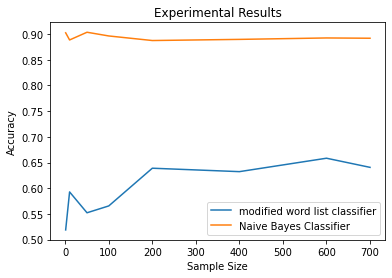

In [23]:
ax = df.plot(kind="line",title="Experimental Results")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Sample Size")

#Question 5)a)

Design Decisions were made randomly by selecting a range of training datasets for our classifiers to be trained on ranging from 1 up to a sample length word list of 700. Then we test both classifiers accuracy and record them against each sample size and will compare the outcomes of our experiment. 

#Question 5)b)

First of all it should be noted that in this experiment two classifiers were trained on different sample sized as shown in the code cell above , those two calssifiers which reslults' are going to be compared now are the SimpleClassifier_mf and the Naive Bayes classifier.

The experiment was basically feeding both classifiers with different sizes of data and see how each classifier's accuracy changes with the amount of data fed.

1)SimpleClassifier_mf:    

From the pandas data frame and from the graph we can see that there is a good amount of fluctuation of the classifier's accuracy with changing sample size.
the general overall trend of the accuracy seems to increase overall with increasing sample size, but in some trails the accuracy tends to fall when the sample size is increased (for example when the sample size is increased from 10 to 50), this may be due to something called overfitting where the classifier is had been trained too many times on the training data and it is finfing a hard time in making new predictions on the test data.Moving on, the optimal size of training data from the samples give seems to be a word list of length 600 which gives the best accuracy.Finally this experiment could be modified by using cross validatoin , but the problem is our testing data is already small, this would have made a difference on biggere data sets.

2)Naive Bayes Classifier:    

The Naive Bayes classifier doesn't seem to have a major fluctuation in accuracy with changing sample size , the difference in accuracy is almost negligable to mention, actually this is an extra point for this classifier as it does't seem to be affected by data size. which means it doesn't matter if we feed it small or big data it will almost give the same results. This is probably due to the reslut that this fancy classifier had been trained on multiple data sets with different sizes many times before.And the best accuracy reslut obtained was with the 50 sample size.

##Conclusion:    
 
of course the recommended practice would be using NLTK Naive Bayes classifier rather than the SimpleClassifer_mf which was coded maually, for the following reasons:    

1) The NLTK library is a well known an widely used library for text/sentiment analysis which is used by many data scientists and big companies to build some advanced classification models, this is because NLTK was develped by experts in this field.

2) The Naive Bayes is doing better with predicting the data in all aspects of the evaluation metrics regardelss of the data size fed to it as it can be seen from the graph.

3) The SimpleClassifier_mf tends to have some fluctuations in accuracy and overall lower evaluatoin metrics when predicting the data.

So in conclusoin the NLTK Naive Bayes classifier is the recommended classifier for use in this case and in cases of bigger data in this field of work.


#Resources

https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5

https://towardsdatascience.com/precision-and-recall-a-simplified-view-bc25978d81e6



In [24]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

filepath="/content/drive/MyDrive/Colab Notebooks"
filepath="/content/drive/MyDrive/Colab Notebooks/Qusai's_NLassignment2021.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

/usr/local/lib/python3.7/dist-packages/nbformat/current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


Submission length is 1295


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
